# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [30]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

In [5]:
hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


****
## Preliminary Analysis

In [64]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


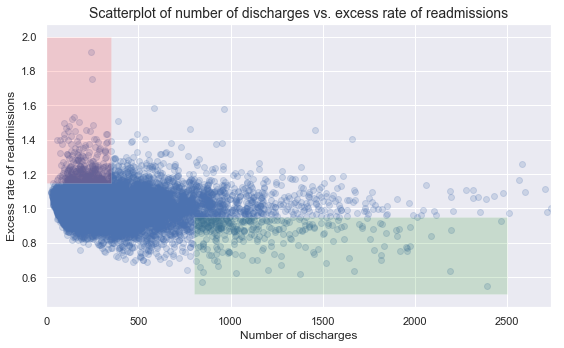

In [65]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges 
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [ ]:
# Your turn


# A. Do you agree with the above analysis and recommendations? Why or why not?
   


**Initial thoughts based on preliminary report**
+ The statistics of the report should provide a stasticial significance test in order to provide a more statistical significant finding and not base the conclusions on a poor statistical analysis of data.
+ We need to perform a proper analysis in order to conclude whether or not there is a significnace correlation between hospital capacity (number of discharges) and readmission rates, and not just base it off a scatter plot.




In [67]:
df = clean_hospital_read_df[['Number of Discharges','Excess Readmission Ratio']]
df.info()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 2 columns):
Number of Discharges        11578 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 271.4 KB


In [68]:
df['Number of Discharges'].isna().value_counts()

False    11578
Name: Number of Discharges, dtype: int64

In [69]:
df['Excess Readmission Ratio'].isna().value_counts()

False    11497
True        81
Name: Excess Readmission Ratio, dtype: int64

In [70]:
df = df[np.isfinite(df['Excess Readmission Ratio'])]


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 2 columns):
Number of Discharges        11497 non-null int64
Excess Readmission Ratio    11497 non-null float64
dtypes: float64(1), int64(1)
memory usage: 269.5 KB


In [72]:
small_hosp = df[df['Number of Discharges'] <= 100]
large_hosp = df[df['Number of Discharges']>100]

#### Perfrom some EDA

In [73]:
def ecdf(data):
    '''compute ECDF fro a one-dimensional array of measurements'''
    # Number of data points
    n = len(data)
    
    #x-values for the ECDF: x
    x = np.sort(data)
    
    #y-values for the ECDF: y
    y = np.arange(1,n+1)/n
    
    return x,y


    

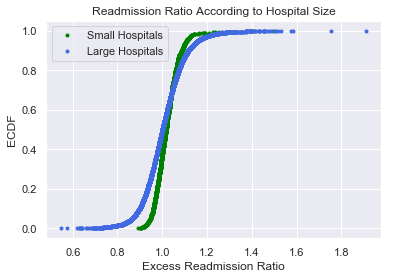

In [74]:
x_small, y_small = ecdf(small_hosp['Excess Readmission Ratio'])
x_large, y_large = ecdf(large_hosp['Excess Readmission Ratio'])


sns.set()
_ = plt.plot(x_small, y_small, marker = '.',linestyle='none',color = 'green')
_ = plt.plot(x_large,y_large, marker='.',linestyle='none',color = 'royalblue')
_ = plt.xlabel('Excess Readmission Ratio')
_ = plt.ylabel('ECDF')
_ = plt.title('Readmission Ratio According to Hospital Size')
_ = plt.legend(('Small Hospitals', 'Large Hospitals'))


# B.  Provide support for your arguments and your own recommendations with a statistically sound analysis

## Setup an appropriate hypothesis test.

**Null Hypothesis**: There is no correlation between number of discharges and readadmission rates

**Alternative Hpyothesis**: There is a correlation between number of discharges and readadmission rates

## Compute and report the observed significance value (or p-value).

/Users/matthewwong/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/matthewwong/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


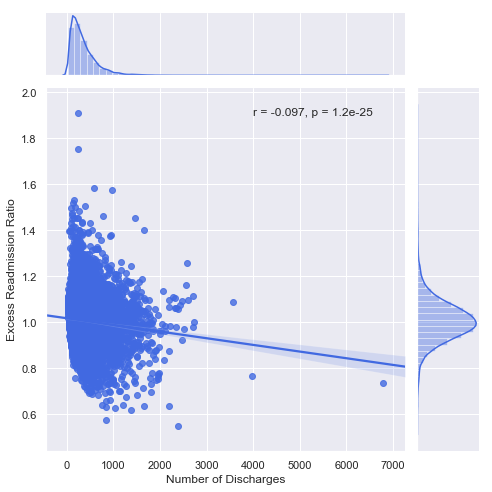

In [96]:
#correlation coefficient, p-value

sns.jointplot('Number of Discharges', 'Excess Readmission Ratio',
              data= df
              , kind='reg',color='royalblue',size=7)
plt.text(400, 1.9,'r = -0.097, p = 1.2e-25')
plt.show()

In [76]:
from scipy import stats

stats.pearsonr(df['Number of Discharges'], df['Excess Readmission Ratio'])

(-0.09739794351079353, 1.222547377680967e-25)

In [78]:
print('Pearson r coefficient is:', -0.097)
print('P-value is:', 1.2e-25)

Pearson r coefficient is: -0.097
P-value is: 1.2e-25


## Report statistical significance for  α  = .01.

**The correlation coefficeint is -0.097 and the p-value is significant at 1.2e-25 < 0.01**, therefore we reject the null hypothesis and accept the alternative hypothesis. We there is no correlation between number of discharges and excess readmission ration and accept there is a correlation. 

## Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

For my analysis statistically there is a negative correlation, however it is not a strong correlation at -0.97 which is close to zero. In practical terms there is a weak relationship between the number of discharge and excess readadmission ratio. 

Because of the weak correlation, I would not recommend that smaller hospitals should be required to demonstrate upgraded resource allocation for quality care to continue operation. 

## Look at the scatterplot above. What are the advantages and disadvantages of using this plot to convey information? Construct another plot that conveys the same information in a more direct manner.

For my joint plot, it conveys the same information but visually shows a negative correlation with a regression line. 